In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

In [ ]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import nltk
nltk.download(['punkt','stopwords'])
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

**Train Dataset**

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Sentiment analysis/test1/new_test_240.csv', encoding= 'unicode_escape')

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uniqueID     240 non-null    int64 
 1   drugName     240 non-null    object
 2   condition    240 non-null    object
 3   review       240 non-null    object
 4   rating       240 non-null    int64 
 5   date         240 non-null    object
 6   usefulCount  240 non-null    int64 
 7   Sentiment    240 non-null    object
dtypes: int64(3), object(5)
memory usage: 15.1+ KB


In [ ]:
train_data["Sentiment"].value_counts()

Neutral     80
Positive    80
Negative    80
Name: Sentiment, dtype: int64

In [ ]:
train_data.dropna(inplace = True)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uniqueID     240 non-null    int64 
 1   drugName     240 non-null    object
 2   condition    240 non-null    object
 3   review       240 non-null    object
 4   rating       240 non-null    int64 
 5   date         240 non-null    object
 6   usefulCount  240 non-null    int64 
 7   Sentiment    240 non-null    object
dtypes: int64(3), object(5)
memory usage: 16.9+ KB


In [ ]:
train_data.shape

(240, 8)

In [ ]:
train_data.isnull().any().any()

False

In [ ]:
train_data.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uniqueID     240 non-null    int64 
 1   drugName     240 non-null    object
 2   condition    240 non-null    object
 3   review       240 non-null    object
 4   rating       240 non-null    int64 
 5   date         240 non-null    object
 6   usefulCount  240 non-null    int64 
 7   Sentiment    240 non-null    object
dtypes: int64(3), object(5)
memory usage: 16.9+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
train_data['vader_score'] = train_data['review'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [ ]:
train_data["vader_score"]

0     -0.6409
1      0.7946
2     -0.5562
3      0.8747
4     -0.2960
        ...  
235   -0.5336
236    0.5413
237    0.0000
238   -0.9225
239   -0.9791
Name: vader_score, Length: 240, dtype: float64

In [ ]:
max(train_data["vader_score"])

0.9916

In [ ]:
min(train_data["vader_score"])

-0.9911

In [ ]:
positive_num = len(train_data[train_data['vader_score']> 0.21])
neutral_num = len(train_data[train_data['vader_score']< 0.4]) and len(train_data[train_data['vader_score']>= 0.0])
negative_num = len(train_data[train_data['vader_score']< 0.00])

In [ ]:
positive_num, negative_num, neutral_num

(85, 137, 103)

In [ ]:
train_data['vader_sentiment_label'] = train_data['vader_score'].map(lambda x : int(1) if x>= 0.4  else int (-1) if (x<0.4 and x> -0.4) else int(0))

In [ ]:
train_data['vader_sentiment_label'].value_counts()

 0    110
 1     69
-1     61
Name: vader_sentiment_label, dtype: int64

In [ ]:
train_data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,Sentiment,vader_score,vader_sentiment_label
0,51215,Azithromycin,Chlamydia Infection,"""Was prescribed one dose over the course of on...",7,14-Dec-15,7,Neutral,-0.6409,0
1,71188,Viberzi,Irritable Bowel Syndrome,"""Have been taking Viberzi for a month now for ...",8,5-Jul-16,15,Positive,0.7946,1
2,80520,Mobic,Osteoarthritis,"""Reduced my pain by 80% and lets me live a nor...",10,13-May-15,82,Positive,-0.5562,0
3,206444,Trilafon,Psychosis,"""I had a similar experience. Tremors in hands...",9,23-May-11,45,Positive,0.8747,1
4,221934,Fluconazole,Vaginal Yeast Infection,"""I am very prone to yeast infections, I believ...",8,24-Apr-17,9,Positive,-0.2960,-1


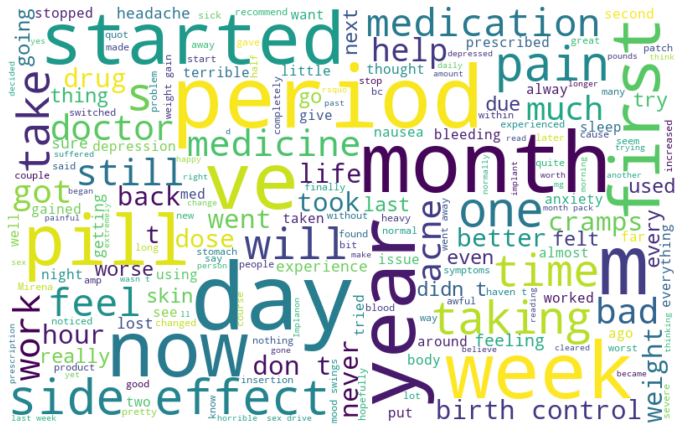

In [ ]:
all_words = ' '.join([text for text in train_data['review']])
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 500, background_color = 'white', random_state = 21, max_font_size = 110).generate(all_words)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

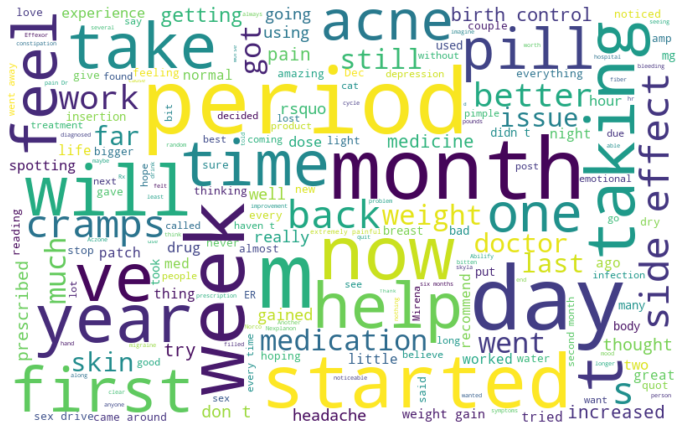

In [ ]:
positive_words = ' '.join([text for text in train_data['review'][train_data['vader_sentiment_label']== 1]])

wordcloud = WordCloud(width = 800, height = 500, background_color = 'white', random_state = 21, max_font_size = 110).generate(positive_words)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

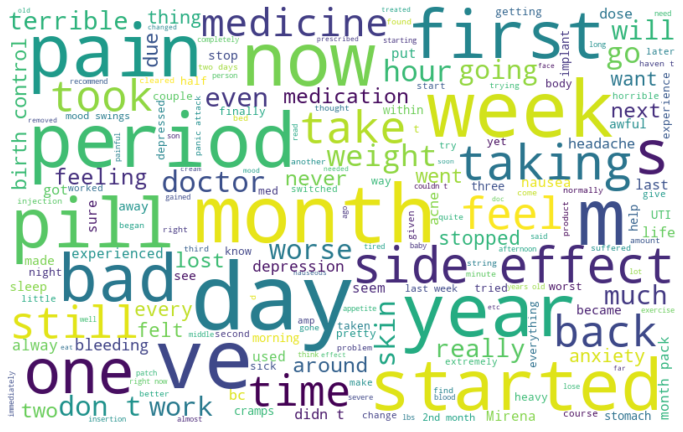

In [ ]:
neutral_words = ' '.join([text for text in train_data['review'][train_data['vader_sentiment_label']== 0]])

wordcloud = WordCloud(width = 800, height = 500, background_color = 'white', random_state = 21, max_font_size = 110).generate(neutral_words)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

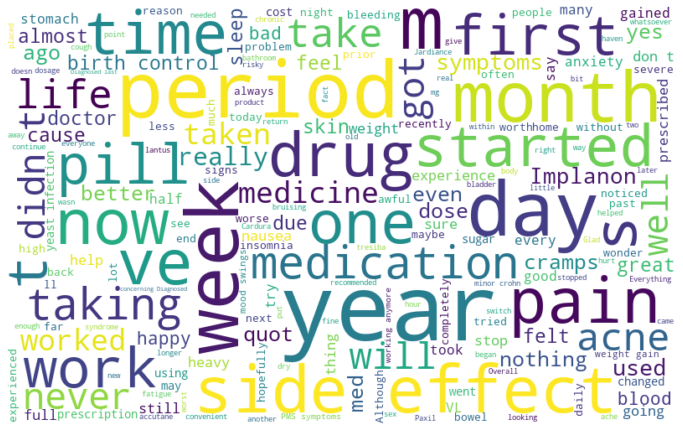

In [ ]:
negative_words = ' '.join([text for text in train_data['review'][train_data['vader_sentiment_label']== -1]])

wordcloud = WordCloud(width = 800, height = 500, background_color = 'white', random_state = 21, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
! pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-p5cce1pf
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-p5cce1pf
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=11756 sha256=d5d875050a6043594997a703f4d44dd60f8179f8b243d356147e964ab83e7155
  Stored in directory: /tmp/pip-ephem-wheel-cache-5wjgym_2/wheels/0d/b3/29/bfe3deffda68980088d17b81331be6667e837ffb4a071bae82
Successfully built preprocess-kgptalkie
  Attempting uninstall: preprocess-kgptalkie
    Found existing installation: preprocess-kgptalkie 0.1.3
    Uninstalling preprocess-kgptalkie-0.1.3:
      Successfully uninstalled preprocess-kgptalkie-0.1.3


In [ ]:
import preprocess_kgptalkie as ps
import re

In [ ]:
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

In [ ]:
train_data['review'] = train_data['review'].apply(lambda x: get_clean(x))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,5),  stop_words='english' , analyzer='word')

In [ ]:
train_data['review']

0      was prescribed one dose over the course of one...
1      have been taking viberzi for a month now for i...
2      reduced my pain by 80 and lets me live a norma...
3      i had a similar experience tremors in hands no...
4      i am very prone to yeast infections i believe ...
                             ...                        
235    i have been on implanon since november 2009 i ...
236    i have been taking norco for foot surgery and ...
237    after using medication for 4 days my feet legs...
238    ive been taking arava for 12 months or so now ...
239    been experiencing very bad anxiety panic attac...
Name: review, Length: 240, dtype: object

**Test Data**

In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/Sentiment analysis/test1/final_new_test_60.csv', encoding= 'unicode_escape')

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ï»¿uniqueID  60 non-null     int64 
 1   drugName     60 non-null     object
 2   condition    60 non-null     object
 3   review       60 non-null     object
 4   rating       60 non-null     int64 
 5   date         60 non-null     object
 6   usefulCount  60 non-null     int64 
 7   Sentiment    60 non-null     object
 8   SR           60 non-null     object
 9   RI           60 non-null     object
 10  RS           60 non-null     object
 11  RD           60 non-null     object
dtypes: int64(3), object(9)
memory usage: 5.8+ KB


In [ ]:
test_data["Sentiment"].value_counts()

Neutral     20
Positive    20
Negative    20
Name: Sentiment, dtype: int64

In [ ]:
test_data['vader_score'] = test_data['review'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [ ]:
test_data["vader_score"]

0     0.6160
1    -0.3292
2     0.9716
3    -0.6876
4    -0.5106
5     0.9826
6    -0.7788
7    -0.5267
8    -0.6935
9     0.9625
10   -0.9621
11    0.6739
12    0.7372
13   -0.6705
14   -0.8889
15   -0.1801
16    0.3190
17    0.2352
18    0.0000
19   -0.4102
20    0.9305
21    0.8225
22    0.9859
23   -0.1386
24   -0.9382
25   -0.9317
26    0.0463
27    0.1145
28    0.5440
29   -0.0120
30   -0.5363
31    0.4404
32    0.8022
33    0.4540
34   -0.6249
35    0.7218
36    0.8481
37   -0.2836
38    0.0889
39   -0.7717
40    0.6452
41    0.5267
42    0.0000
43   -0.0000
44    0.1163
45   -0.6597
46    0.5719
47    0.6483
48   -0.2975
49    0.3818
50    0.4939
51   -0.9127
52    0.9297
53   -0.3818
54   -0.5098
55   -0.5336
56    0.6229
57    0.7347
58   -0.9481
59    0.4939
Name: vader_score, dtype: float64

In [ ]:
max(test_data["vader_score"])

0.9859

In [ ]:
min(test_data["vader_score"])

-0.9621

In [ ]:
positive_num = len(test_data[test_data['vader_score']> 0.21])
neutral_num = len(test_data[test_data['vader_score']< 0.4]) and len(test_data[test_data['vader_score']>= 0.0])
negative_num = len(test_data[test_data['vader_score']< 0.00])

In [ ]:
positive_num, negative_num, neutral_num

(27, 26, 34)

In [ ]:
test_data['vader_sentiment_label'] = test_data['vader_score'].map(lambda x : int(1) if x>= 0.4  else int (-1) if (x<0.4 and x> -0.4) else int(0))

In [ ]:
test_data['vader_sentiment_label'].value_counts()

 1    24
 0    19
-1    17
Name: vader_sentiment_label, dtype: int64

In [ ]:
test_data.head()

,ï»¿uniqueID,drugName,condition,review,rating,date,usefulCount,Sentiment,SR,RI,RS,RD,vader_score,vader_sentiment_label
0,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,Neutral,"""1 employ to takings another oral contraceptiv...","""I weeks to take another oral contraceptive, w...","""I used to take another oral contraceptive, wh...","""I used to take another oral contraceptive, wh...",0.6160,1
1,221320,Dextromethorphan,Cough,"""Have a little bit of a lingering cough from a...",4,7-Sep-17,1,Neutral,"""get a little bit of a lingering cough first a...","""Have a little bit of a lingering cough from a...","""Have a little bit of a loiter cough from a co...","""Have a little bit of a lingering cough from a...",-0.3292,-1
2,132258,Ativan,Panic Disorde,"""Honestly, I have been taking ativan for 2 yea...",6,1-Jun-15,47,Neutral,"""Honestly, I have been taking ativan for 2 yea...","""Honestly, I have been taking ativan for 2 now...","""Honestly, I have been taking ativan for 2 yea...","""Honestly, I have been demand ativan for 2 yea...",0.9716,1
3,204999,Toradol,Pain,"""I am 30 years old. I had a multiple composite...",10,11-Feb-13,16,Positive,"""I am 30 years Old. I had a multiple composite...","""I am 30 years old. I had a multiple composite...","""I am years old. I had a multiple composite sp...","""I am 30 years old. I had a multiple composite...",-0.6876,0
4,93678,Morphine,Pain,"""I have been on morphine for at least 7 years....",8,8-May-10,19,Positive,"""I have been on morphine for at least septenar...","""have been on morphine for least 7 years..It i...","""I have been on morphine for at least 7 I..It ...","""I have been follow on morphine for at least c...",-0.5106,0


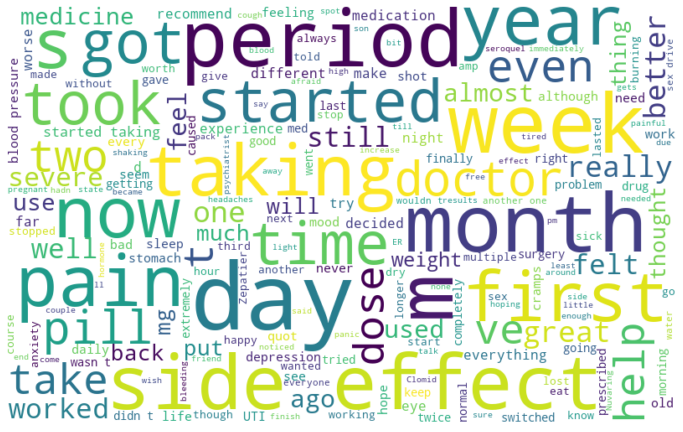

In [ ]:
all_words = ' '.join([text for text in test_data['review']])
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 500, background_color = 'white', random_state = 21, max_font_size = 110).generate(all_words)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

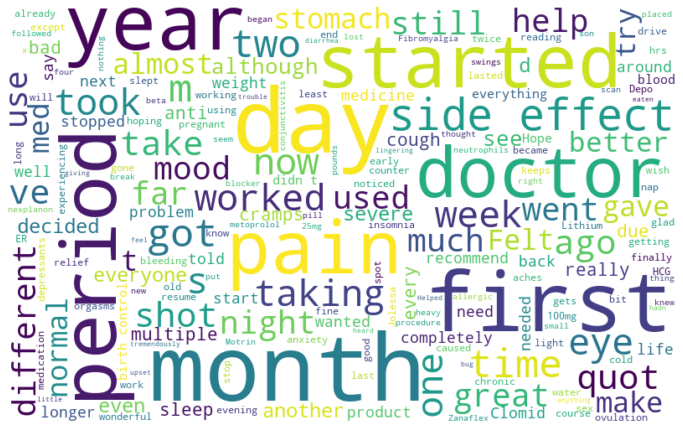

In [ ]:
positive_words = ' '.join([text for text in test_data['review'][train_data['vader_sentiment_label']== 1]])

wordcloud = WordCloud(width = 800, height = 500, background_color = 'white', random_state = 21, max_font_size = 110).generate(positive_words)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

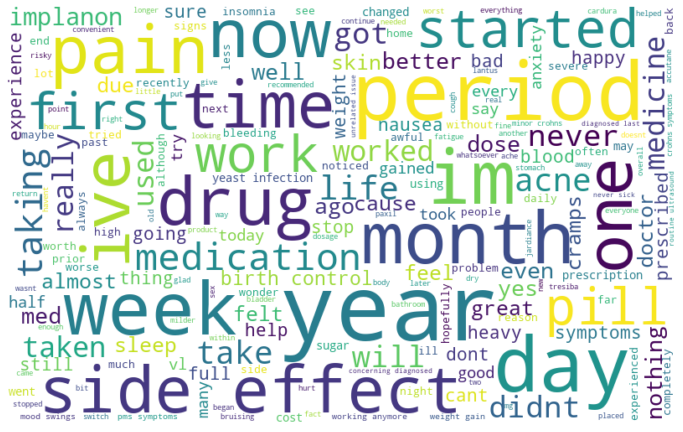

In [ ]:
negative_words = ' '.join([text for text in train_data['review'][train_data['vader_sentiment_label']== -1]])

wordcloud = WordCloud(width = 800, height = 500, background_color = 'white', random_state = 21, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
test_data['review'] = test_data['review'].apply(lambda x: get_clean(x))

In [ ]:
test_data['review']

0     i used to take another oral contraceptive whic...
1     have a little bit of a lingering cough from a ...
2     honestly i have been taking ativan for 2 years...
3     i am 30 years old i had a multiple composite s...
4     i have been on morphine for at least 7 yearsit...
5     i am just finishing my second week taking cont...
6     my gp started me on venlafaxine yesterday to h...
7     helps against sadness and strongly counters mo...
8     i battled a nasty uti for over a month went th...
9     i have had great experience so far with latuda...
10    was on this med for 5 years worked fine but no...
11    i started taking zepatier three days ago no si...
12    i took clomid for the first time last month my...
13    66 yo caucasian male developed miss 23 diagnos...
14    started taking it and i slept well at night an...
15    i appreciate lithium although my thyroid level...
16    intake effexor xr 375 mg and lorazepam for dep...
17    i am torn by the nuvaring the convenience 

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ï»¿uniqueID            60 non-null     int64  
 1   drugName               60 non-null     object 
 2   condition              60 non-null     object 
 3   review                 60 non-null     object 
 4   rating                 60 non-null     int64  
 5   date                   60 non-null     object 
 6   usefulCount            60 non-null     int64  
 7   Sentiment              60 non-null     object 
 8   SR                     60 non-null     object 
 9   RI                     60 non-null     object 
 10  RS                     60 non-null     object 
 11  RD                     60 non-null     object 
 12  vader_score            60 non-null     float64
 13  vader_sentiment_label  60 non-null     int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 6.7+ KB


In [ ]:
test_data['SR'] = test_data['SR'].apply(lambda x: get_clean(x))

In [ ]:
test_data['SR']

0     1 employ to takings another oral contraceptive...
1     get a little bit of a lingering cough first a ...
2     honestly i have been taking ativan for 2 years...
3     i am 30 years old i had a multiple composite s...
4     i have been on morphine for at least septenary...
5     i am just finishing my second week taking cont...
6     my gp forbidden started me assist on venlafaxi...
7     helps against sadness and strongly counters mo...
8     i battled a nasty uti for over a back went thr...
9     have had great experience so far with latuda i...
10    was on this med for 5 years worked fine but fi...
11    i started taking zepatier three days ago no si...
12    i took clomid for the first time last month my...
13    yo caucasian male developed diagnosed 30 devel...
14    started taking it and i slept well at night an...
15    appreciate lithium although my thyroid level i...
16    ingestion effexor xr 375 mg and lorazepam for ...
17    i torn by the nuvaring the convenience is 

In [ ]:
test_data['RI'] = test_data['RI'].apply(lambda x: get_clean(x))

In [ ]:
test_data['RI']

0     i weeks to take another oral contraceptive whi...
1     have a little bit of a lingering cough from a ...
2     honestly i have been taking ativan for 2 now 1...
3     i am 30 years old i had a multiple composite s...
4     have been on morphine for least 7 yearsit is t...
5     i just finishing my second week taking and hav...
6     food gp started me on venlafaxine yesterday to...
7     facilitate against sadness and strongly counte...
8     i battled a nasty uti for over a month went th...
9     i have had expectant experience so far with la...
10    was on this med for 5 years worked fine but no...
11    i started taking zepatier three days ago no si...
12    i took clomid for the first time last month my...
13    66 yo caucasian male developed miss 23 diagnos...
14    started taking it and i slept well at and awok...
15    i prize lithium although my thyroid stage is l...
16    intake effexor xr 375 mg and lorazepam for dep...
17    i am torn by the nuvaring the convenience 

In [ ]:
test_data['RS'] = test_data['RS'].apply(lambda x: get_clean(x))

In [ ]:
test_data['RS']

0     i used to take another oral contraceptive whic...
1     have a little bit of a loiter cough from a col...
2     honestly i have been taking ativan for 2 years...
3     i am years old i had a multiple composite spin...
4     i have been on morphine for at least 7 iit is ...
5     i am just finishing my second week taking cont...
6     my gp started me on venlafaxine to help depres...
7     helps against sadness and strongly counters mo...
8     i battled a nasty uti for over a month locomot...
9     i have had great experience so far with latuda...
10    was on this med for worked but not great stopp...
11    i started remove zepatier three days ago no si...
12    i took clomid for the first time last month hu...
13    66 yo caucasian male developed k 23 diagnosed ...
14    started taking it and i slept well at night an...
15    appreciate lithium although my thyroid level i...
16    intake effexor xr 375 mg and for depression an...
17    i am few by the nuvaring the convenience i

In [ ]:
test_data['RD'] = test_data['RD'].apply(lambda x: get_clean(x))

In [ ]:
test_data['RD']

0     i used to take another oral contraceptive whic...
1     have a little bit of a lingering cough from a ...
2     honestly i have been demand ativan for 2 years...
3     i am 30 years old i had a multiple composite s...
4     i have been follow on morphine for at least co...
5     i am just terminate my second week before midd...
6     my gp started me on venlafaxine yesterday to h...
7     helps against sadness and strongly counters mo...
8     i battled a nasty uti inch for over a month we...
9     i put had because experience so far with latud...
10    was every this med for 5 years worked fine but...
11    ago the taking zepatier now days i no sides s ...
12    i took clomid for the first time last month my...
13    66 never tramadol male developed miss once dia...
14    started remove it and unity slept well at nigh...
15    i appreciate anxiousness lithium although my t...
16    intake effexor xr 375 mg shall reduce for depr...
17    i am torn by the nuvaring the convenience 

**Test Data - SR**

In [ ]:
test_data_sr = pd.read_csv('/content/drive/MyDrive/Sentiment analysis/test1/final_new_test_60.csv', encoding= 'unicode_escape')

In [ ]:
test_data_sr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ï»¿uniqueID  60 non-null     int64 
 1   drugName     60 non-null     object
 2   condition    60 non-null     object
 3   review       60 non-null     object
 4   rating       60 non-null     int64 
 5   date         60 non-null     object
 6   usefulCount  60 non-null     int64 
 7   Sentiment    60 non-null     object
 8   SR           60 non-null     object
 9   RI           60 non-null     object
 10  RS           60 non-null     object
 11  RD           60 non-null     object
dtypes: int64(3), object(9)
memory usage: 5.8+ KB


In [ ]:
test_data_sr = test_data_sr.drop(columns=['review', 'RI','RS','RD'])

In [ ]:
test_data_sr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ï»¿uniqueID  60 non-null     int64 
 1   drugName     60 non-null     object
 2   condition    60 non-null     object
 3   rating       60 non-null     int64 
 4   date         60 non-null     object
 5   usefulCount  60 non-null     int64 
 6   Sentiment    60 non-null     object
 7   SR           60 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.9+ KB


In [ ]:
test_data_sr['vader_score'] = test_data_sr['SR'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [ ]:
test_data_sr["vader_score"]

0    -0.2549
1    -0.3292
2     0.9611
3    -0.5296
4    -0.5106
5     0.9847
6    -0.8628
7    -0.5267
8    -0.6935
9     0.9625
10   -0.9651
11    0.7739
12    0.7361
13   -0.8176
14   -0.8889
15   -0.1801
16    0.7717
17   -0.2953
18    0.0000
19   -0.4102
20    0.9300
21    0.6808
22    0.9859
23   -0.0679
24   -0.9382
25   -0.9150
26    0.1480
27    0.0129
28    0.5440
29   -0.0120
30   -0.7246
31    0.4215
32    0.8520
33    0.4540
34    0.0000
35    0.4993
36    0.8481
37   -0.5033
38   -0.5033
39   -0.7717
40    0.6452
41    0.5267
42    0.0000
43   -0.0000
44    0.1163
45   -0.6597
46    0.5719
47    0.7314
48   -0.2975
49    0.3818
50    0.4939
51   -0.9127
52    0.8530
53   -0.3818
54   -0.5098
55   -0.2128
56    0.6229
57    0.7347
58   -0.9481
59    0.4939
Name: vader_score, dtype: float64

In [ ]:
max(test_data_sr["vader_score"])

0.9859

In [ ]:
min(test_data_sr["vader_score"])

-0.9651

In [ ]:
positive_num = len(train_data[train_data['vader_score']> 0.21])
neutral_num = len(train_data[train_data['vader_score']< 0.4]) and len(train_data[train_data['vader_score']>= 0.0])
negative_num = len(train_data[train_data['vader_score']< 0.00])

In [ ]:
positive_num, negative_num, neutral_num

(85, 137, 103)

In [ ]:
test_data_sr['vader_sentiment_label'] = test_data_sr['vader_score'].map(lambda x : int(1) if x>= 0.4  else int (-1) if (x<0.4 and x> -0.4) else int(0))

In [ ]:
test_data_sr['vader_sentiment_label'].value_counts()

 1    24
 0    19
-1    17
Name: vader_sentiment_label, dtype: int64

In [ ]:
test_data_sr.head()

,ï»¿uniqueID,drugName,condition,rating,date,usefulCount,Sentiment,SR,vader_score,vader_sentiment_label
0,92703,Lybrel,Birth Control,5,14-Dec-09,17,Neutral,"""1 employ to takings another oral contraceptiv...",-0.2549,-1
1,221320,Dextromethorphan,Cough,4,7-Sep-17,1,Neutral,"""get a little bit of a lingering cough first a...",-0.3292,-1
2,132258,Ativan,Panic Disorde,6,1-Jun-15,47,Neutral,"""Honestly, I have been taking ativan for 2 yea...",0.9611,1
3,204999,Toradol,Pain,10,11-Feb-13,16,Positive,"""I am 30 years Old. I had a multiple composite...",-0.5296,0
4,93678,Morphine,Pain,8,8-May-10,19,Positive,"""I have been on morphine for at least septenar...",-0.5106,0


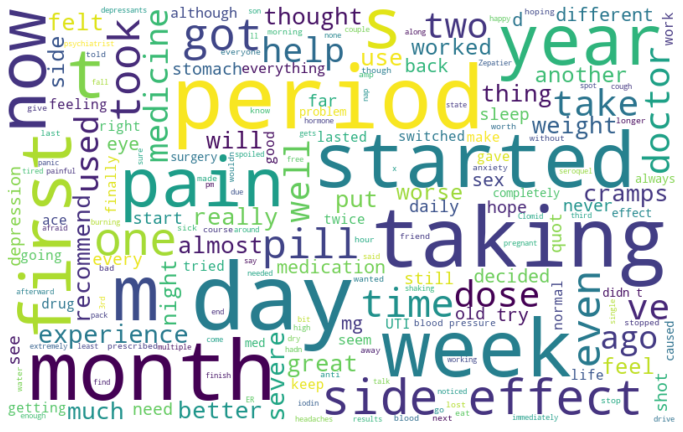

In [ ]:
all_words = ' '.join([text for text in test_data_sr['SR']])
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 500, background_color = 'white', random_state = 21, max_font_size = 110).generate(all_words)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

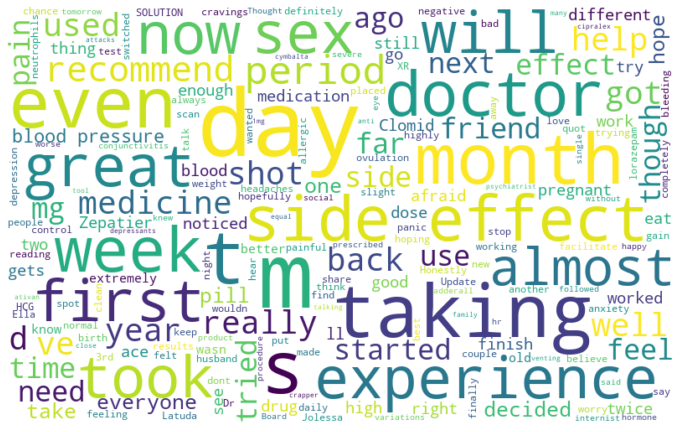

In [ ]:
positive_words = ' '.join([text for text in test_data_sr['SR'][test_data_sr['vader_sentiment_label']== 1]])

wordcloud = WordCloud(width = 800, height = 500, background_color = 'white', random_state = 21, max_font_size = 110).generate(positive_words)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

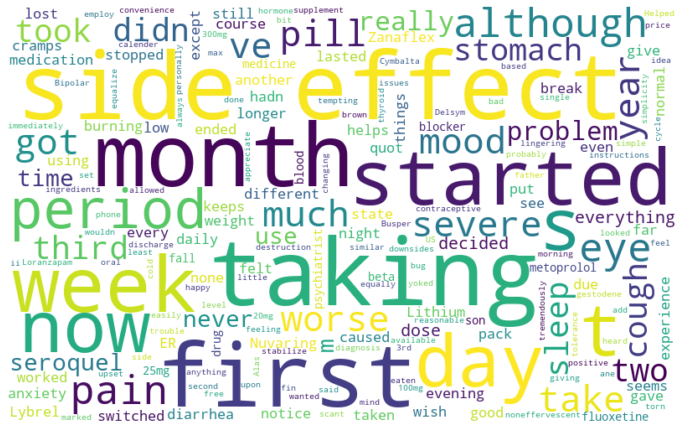

In [ ]:
negative_words = ' '.join([text for text in test_data_sr['SR'][test_data_sr['vader_sentiment_label']== -1]])

wordcloud = WordCloud(width = 800, height = 500, background_color = 'white', random_state = 21, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
test_data_sr['SR']

0     "1 employ to takings another oral contraceptiv...
1     "get a little bit of a lingering cough first a...
2     "Honestly, I have been taking ativan for 2 yea...
3     "I am 30 years Old. I had a multiple composite...
4     "I have been on morphine for at least septenar...
5     "I am just finishing my second week taking Con...
6     "my gp forbidden started me assist on Venlafax...
7     "Helps against sadness, and strongly counters ...
8     "I battled a nasty UTI for over a back &amp; w...
9     "have had great experience so far with Latuda....
10    "Was on this med for 5 years. Worked fine but ...
11    "I started taking Zepatier three days ago! No ...
12    "I took Clomid for the first time last month. ...
13    "YO caucasian, male. Developed @, diagnosed @3...
14    "Started taking it and I slept well at night a...
15    " appreciate Lithium. Although my thyroid leve...
16    "ingestion Effexor XR 375 mg, and lorazepam fo...
17    "I torn by the Nuvaring. The convenience i

In [ ]:
test_data_sr['review'] = test_data_sr['SR'].apply(lambda x: get_clean(x))

In [ ]:
test_data_sr['review']

0     1 employ to takings another oral contraceptive...
1     get a little bit of a lingering cough first a ...
2     honestly i have been taking ativan for 2 years...
3     i am 30 years old i had a multiple composite s...
4     i have been on morphine for at least septenary...
5     i am just finishing my second week taking cont...
6     my gp forbidden started me assist on venlafaxi...
7     helps against sadness and strongly counters mo...
8     i battled a nasty uti for over a back went thr...
9     have had great experience so far with latuda i...
10    was on this med for 5 years worked fine but fi...
11    i started taking zepatier three days ago no si...
12    i took clomid for the first time last month my...
13    yo caucasian male developed diagnosed 30 devel...
14    started taking it and i slept well at night an...
15    appreciate lithium although my thyroid level i...
16    ingestion effexor xr 375 mg and lorazepam for ...
17    i torn by the nuvaring the convenience is 

**Train-Test**

In [ ]:
X = tfidf.fit_transform(train_data['review'])
Y = train_data['vader_sentiment_label']

In [ ]:
x = tfidf.fit_transform(test_data_sr['review'])
y = test_data_sr['vader_sentiment_label']

In [ ]:
Y

0      0
1      1
2      0
3      1
4     -1
      ..
235    0
236    1
237   -1
238    0
239    0
Name: vader_sentiment_label, Length: 240, dtype: int64

In [ ]:
y

0    -1
1    -1
2     1
3     0
4     0
5     1
6     0
7     0
8     0
9     1
10    0
11    1
12    1
13    0
14    0
15   -1
16    1
17   -1
18   -1
19    0
20    1
21    1
22    1
23   -1
24    0
25    0
26   -1
27   -1
28    1
29   -1
30    0
31    1
32    1
33    1
34   -1
35    1
36    1
37    0
38    0
39    0
40    1
41    1
42   -1
43   -1
44   -1
45    0
46    1
47    1
48   -1
49   -1
50    1
51    0
52    1
53   -1
54    0
55   -1
56    1
57    1
58    0
59    1
Name: vader_sentiment_label, dtype: int64

In [ ]:
X.shape, Y.shape

((240, 5000), (240,))

In [ ]:
x.shape, y.shape

((60, 5000), (60,))

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(Y)
Y= label_encoder.transform(Y)
classes = label_encoder.classes_

In [ ]:
y= label_encoder.transform(y)
label_encoder.fit(y)

LabelEncoder()

**Classifier: MultiLayer Perceptron (ANN)**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
nnc = MLPClassifier(hidden_layer_sizes=(9),activation="relu",max_iter=1000)
nnc.fit(X, Y)
nnc_pred =nnc.predict(x)
nnc_acc=accuracy_score(y, nnc_pred)
print(nnc_acc)

0.3


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y, nnc_pred))

              precision    recall  f1-score   support

           0       0.33      0.12      0.17        17
           1       0.29      0.53      0.37        19
           2       0.32      0.25      0.28        24

    accuracy                           0.30        60
   macro avg       0.31      0.30      0.27        60
weighted avg       0.31      0.30      0.28        60



Text(0.5, 142.81999999999996, 'Predicted')

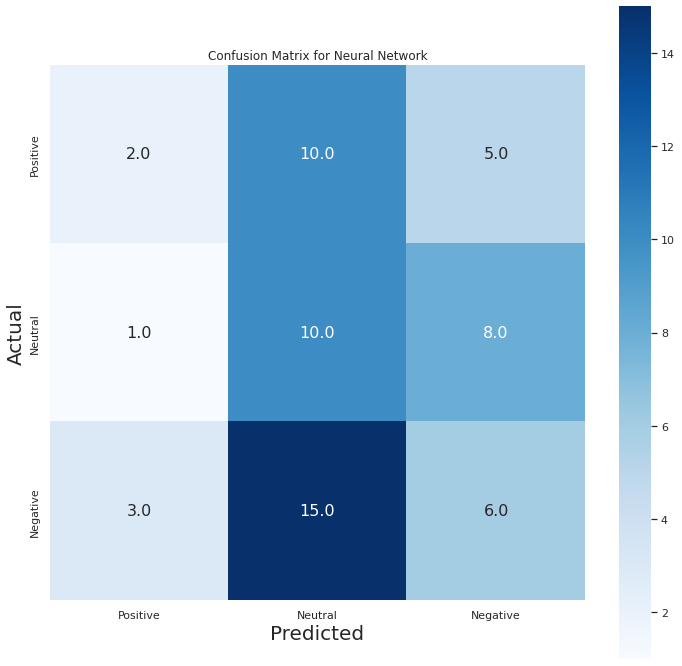

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = nnc_pred
label=['Positive', 'Neutral','Negative']
Ytrue = y
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for Neural Network")
ax = sns.heatmap(cm, cmap="Blues", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc

In [ ]:
from sklearn.neural_network import MLPClassifier
ANN = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes=(9),activation="relu",max_iter=1000))
ANN.fit(X, Y)
Y_pred = ANN.predict(x)
pred_prob = ANN.predict_proba(x)

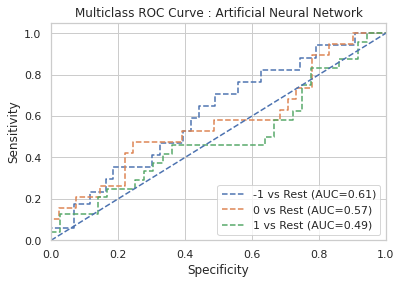

In [ ]:
from sklearn.preprocessing import label_binarize

Y_test_binarized = label_binarize(y, classes = np.unique(y))
fpr = {}
tpr = {}
thresh = {}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(Y_test_binarized[:,i], pred_prob[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

  plt.plot(fpr[i], tpr[i], linestyle='--',
           label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))
  
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC Curve : Artificial Neural Network')
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.legend(loc= 'lower right')
plt.show()

**Classifier: CNN**

In [ ]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras import losses
from collections import Counter
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pydot

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_url(text): 
    url_pattern  = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    return url_pattern.sub(r'', text)
 # converting return value from list to string



def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>2))]) 
    
    return text2.lower()

In [ ]:
#train_data= pd.read_csv("/content/drive/MyDrive/Sentiment analysis/new_lstm.csv", encoding= 'unicode_escape')
#train_data.dropna(axis = 0, how ='any',inplace=True) 
train_data['Num_words_text'] = train_data['review'].apply(lambda x:len(str(x).split())) 
mask = train_data['Num_words_text'] >2
train_data = train_data[mask]
print('-------Train data--------')
print(train_data['Sentiment'].value_counts())
print(len(train_data))
print('-------------------------')
max_train_sentence_length  = train_data['Num_words_text'].max()


train_data['review'] = train_data['review'].apply(remove_emoji)
train_data['review'] = train_data['review'].apply(remove_url)
train_data['review'] = train_data['review'].apply(clean_text)


#test_data= pd.read_csv("/content/drive/MyDrive/Sentiment analysis/new_lstm_test.csv", encoding= 'unicode_escape')
#test_data.dropna(axis = 0, how ='any',inplace=True) 
test_data_sr['Num_words_text'] = test_data_sr['review'].apply(lambda x:len(str(x).split())) 

max_test_sentence_length  = test_data_sr['Num_words_text'].max()

mask = test_data_sr['Num_words_text'] >2
test_data_sr = test_data[mask]

print('-------Test data--------')
print(test_data_sr['vader_sentiment_label'].value_counts())
print(len(test_data_sr))
print('-------------------------')

test_data_sr['review'] = test_data_sr['review'].apply(remove_emoji)
test_data_sr['review'] = test_data_sr['review'].apply(remove_url)
test_data_sr['review'] = test_data_sr['review'].apply(clean_text)


print('Train Max Sentence Length :'+str(max_train_sentence_length))
print('Test Max Sentence Length :'+str(max_test_sentence_length))

#all_sentences = train_data['text'].tolist() + test_data['text'].tolist()

-------Train data--------
Neutral     80
Negative    80
Positive    79
Name: Sentiment, dtype: int64
239
-------------------------
-------Test data--------
 1    24
 0    19
-1    17
Name: vader_sentiment_label, dtype: int64
60
-------------------------
Train Max Sentence Length :409
Test Max Sentence Length :154


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [ ]:
num_words = 20000
tokenizer = Tokenizer(num_words=num_words,oov_token="unk")
tokenizer.fit_on_texts(train_data['review'].tolist())
print(str(tokenizer.texts_to_sequences(['xyz how are you'])))

[[1, 132, 55, 51]]


In [ ]:
X = train_data['review'].tolist()
Y = train_data['vader_sentiment_label'].tolist()

In [ ]:
x = test_data_sr['review'].tolist()
y = test_data_sr['vader_sentiment_label'].tolist()

In [ ]:
print('Train data len:'+str(len(X)))
print('Class distribution'+str(Counter(Y)))
print('Valid data len:'+str(len(x)))
print('Class distribution'+ str(Counter(y)))

Train data len:239
Class distributionCounter({0: 110, 1: 69, -1: 60})
Valid data len:60
Class distributionCounter({1: 24, 0: 19, -1: 17})


In [ ]:
X = np.array( tokenizer.texts_to_sequences(X) )
x = np.array( tokenizer.texts_to_sequences(x) )
x_test  = np.array( tokenizer.texts_to_sequences(test_data_sr['review'].tolist()) )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify

In [ ]:
X = pad_sequences(X, padding='post', maxlen=40)
x = pad_sequences(x, padding='post', maxlen=40)
x_test = pad_sequences(x_test, padding='post', maxlen=40)

In [ ]:
print(X[0])

[ 392  148 1318 1319  226   65   11  875    2 1320    3  876  108  210
  289   78  877  313   39  200  107    8  201  149   40    5 1321    2
  128   63   57  348  392  148  664    8  135  665  241   15]


In [ ]:
le = LabelEncoder()

In [ ]:
train_labels = le.fit_transform(Y)
train_labels = np.asarray( tf.keras.utils.to_categorical(train_labels))
#print(train_labels)
valid_labels = le.transform(y)
valid_labels = np.asarray( tf.keras.utils.to_categorical(valid_labels))

In [ ]:
test_labels = le.transform(test_data_sr['vader_sentiment_label'].tolist())
test_labels = np.asarray(tf.keras.utils.to_categorical(test_labels))
list(le.classes_)

[-1, 0, 1]

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((X,train_labels))
valid_ds = tf.data.Dataset.from_tensor_slices((x,valid_labels))
test_ds = tf.data.Dataset.from_tensor_slices((x_test,test_labels))

In [ ]:
print(Y[:10])
train_labels = le.fit_transform(Y)
print('Text to number')
print(train_labels[:10])
train_labels = np.asarray( tf.keras.utils.to_categorical(train_labels))
print('Number to category')
print(train_labels[:10])

[0, 1, 0, 1, -1, 0, -1, -1, 1, 0]
Text to number
[1 2 1 2 0 1 0 0 2 1]
Number to category
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [ ]:
count =0
print('======Train dataset ====')
for value,label in train_ds:
    count += 1
    print(value,label)
    if count==3:
        break
count =0
print('======Validation dataset ====')
for value,label in valid_ds:
    count += 1
    print(value,label)
    if count==3:
        break
print('======Test dataset ====')
for value,label in test_ds:
    count += 1
    print(value,label)
    if count==3:
        break  

======Train dataset ====
tf.Tensor(
[ 392  148 1318 1319  226   65   11  875    2 1320    3  876  108  210
  289   78  877  313   39  200  107    8  201  149   40    5 1321    2
  128   63   57  348  392  148  664    8  135  665  241   15], shape=(40,), dtype=int32) tf.Tensor([0. 1. 0.], shape=(3,), dtype=float32)
tf.Tensor(
[   5   12   28 1322    4   34   15    4 1323    3  175  878    5  879
   21   44  530   51    4  393  227  112    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0], shape=(40,), dtype=int32) tf.Tensor([0. 0. 1.], shape=(3,), dtype=float32)
tf.Tensor(
[880  20   3 666 881 227  90 112   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0], shape=(40,), dtype=int32) tf.Tensor([0. 1. 0.], shape=(3,), dtype=float32)
======Validation dataset ====
tf.Tensor(
[ 273   72   99  105  346   18  430    4   86   32    3   15   37    2
  330    2  346   50   57    5

In [ ]:
max_features =20000
embedding_dim =64
sequence_length = 40

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features +1, embedding_dim, input_length=sequence_length,\
                                    embeddings_regularizer = regularizers.l2(0.0005)))                                    

model.add(tf.keras.layers.Conv1D(128,3, activation='relu',\
                                 kernel_regularizer = regularizers.l2(0.0005),\
                                 bias_regularizer = regularizers.l2(0.0005)))                               


model.add(tf.keras.layers.GlobalMaxPooling1D())

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(3, activation='sigmoid',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))
                               

model.summary()
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer='Nadam', metrics=["CategoricalAccuracy"])

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 40, 64)            1280064   
                                                                 
 conv1d_10 (Conv1D)          (None, 38, 128)           24704     
                                                                 
 global_max_pooling1d_10 (Gl  (None, 128)              0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_19 (Dropout)        (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 3)                 387       
                                                                 
Total params: 1,305,155
Trainable params: 1,305,155
Non-trainable params: 0
___________________________________________

In [ ]:
epochs = 100
# Fit the model using the train and test datasets.
#history = model.fit(x_train, train_labels,validation_data= (x_test,test_labels),epochs=epochs )
history = model.fit(train_ds.shuffle(2000).batch(128),
                    epochs= epochs ,
                    validation_data=valid_ds.batch(128),
                    verbose=1)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


2/2 [==============================] - 3s 266ms/step - loss: 1.6593 - categorical_accuracy: 0.3891 - val_loss: 1.6233 - val_categorical_accuracy: 0.3333
Epoch 2/100
2/2 [==============================] - 0s 84ms/step - loss: 1.5959 - categorical_accuracy: 0.4561 - val_loss: 1.5849 - val_categorical_accuracy: 0.3167
Epoch 3/100
2/2 [==============================] - 0s 89ms/step - loss: 1.5370 - categorical_accuracy: 0.5146 - val_loss: 1.5483 - val_categorical_accuracy: 0.3167
Epoch 4/100
2/2 [==============================] - 0s 94ms/step - loss: 1.4839 - categorical_accuracy: 0.5105 - val_loss: 1.5132 - val_categorical_accuracy: 0.3167
Epoch 5/100
2/2 [==============================] - 0s 76ms/step - loss: 1.4365 - categorical_accuracy: 0.5105 - val_loss: 1.4799 - val_categorical_accuracy: 0.3167
Epoch 6/100
2/2 [==============================] - 0s 74ms/step - loss: 1.3946 - categorical_accuracy: 0.4854 - val_loss: 1.4486 - val_categorical_accuracy: 0.3167
Epoch 7/100
2/2 [==========

In [ ]:
history.history

{'loss': [1.6592991352081299,
  1.5959004163742065,
  1.536972165107727,
  1.4838547706604004,
  1.4365439414978027,
  1.3946195840835571,
  1.3462886810302734,
  1.2984741926193237,
  1.265882134437561,
  1.2294602394104004,
  1.2057859897613525,
  1.1685670614242554,
  1.1413824558258057,
  1.1083693504333496,
  1.0876935720443726,
  1.0646696090698242,
  1.037779450416565,
  1.0261398553848267,
  0.9970136284828186,
  0.9800019860267639,
  0.9488715529441833,
  0.9367988705635071,
  0.9189371466636658,
  0.8952218890190125,
  0.8851196765899658,
  0.8615438938140869,
  0.8506726622581482,
  0.8294717669487,
  0.8134230971336365,
  0.7865719199180603,
  0.7616330981254578,
  0.7555952072143555,
  0.7200431227684021,
  0.7014865875244141,
  0.6951131820678711,
  0.6747003197669983,
  0.6512411832809448,
  0.6089184880256653,
  0.6172568202018738,
  0.5780962705612183,
  0.5650342702865601,
  0.5468974709510803,
  0.5197114944458008,
  0.5023210644721985,
  0.49237751960754395,
  0.492

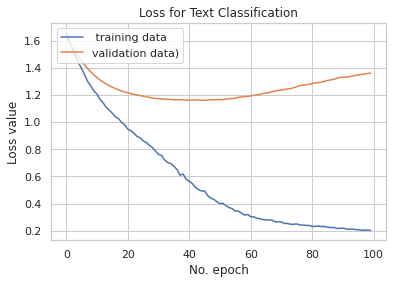

In [ ]:
plt.plot(history.history['loss'], label=' training data')
plt.plot(history.history['val_loss'], label='validation data)')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Sentiment analysis/model-CNN/tf_cnnmodel') 
json_string = tokenizer.to_json()

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/Sentiment analysis/model-CNN/tf_cnnmodel')
new_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 40, 64)            1280064   
                                                                 
 conv1d_10 (Conv1D)          (None, 38, 128)           24704     
                                                                 
 global_max_pooling1d_10 (Gl  (None, 128)              0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_19 (Dropout)        (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 3)                 387       
                                                                 
Total params: 1,305,155
Trainable params: 1,305,155
Non-trainable params: 0
___________________________________________

In [ ]:
import json

In [ ]:
with open('/content/drive/MyDrive/Sentiment analysis/model-CNN/tokenizer.json') as json_file:
    json_string = json.load(json_file)
tokenizer1 = tf.keras.preprocessing.text.tokenizer_from_json(json_string)

In [ ]:
x_test  = np.array( tokenizer1.texts_to_sequences(test_data_sr['review'].tolist()) )
x_test = pad_sequences(x_test, padding='post', maxlen=40)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [ ]:
# Generate predictions (probabilities -- the output of the last layer)
# on test  data using `predict`
print("Generate predictions for all samples")
predictions = new_model.predict(x_test)
print(predictions)
predict_results = predictions.argmax(axis=1)

Generate predictions for all samples
[[0.1744293  0.7781558  0.3178712 ]
 [0.09163371 0.89817    0.18801767]
 [0.20339113 0.6276244  0.52071506]
 [0.18648109 0.7719225  0.2837491 ]
 [0.48118395 0.3487894  0.70112354]
 [0.4766369  0.32974815 0.50483906]
 [0.18263495 0.81554914 0.1633395 ]
 [0.6196966  0.45051655 0.42998594]
 [0.22565651 0.7611194  0.21641782]
 [0.2657487  0.7732675  0.22593406]
 [0.60676295 0.4394499  0.36348858]
 [0.54830974 0.5096396  0.29804155]
 [0.42825642 0.49565384 0.4261656 ]
 [0.15777555 0.8536374  0.21030483]
 [0.1878089  0.8302928  0.14739418]
 [0.13159359 0.82250196 0.21412975]
 [0.15675393 0.6466862  0.56505513]
 [0.23959121 0.58325475 0.5872395 ]
 [0.33494925 0.6292184  0.4075464 ]
 [0.22526795 0.5819748  0.4435004 ]
 [0.47435614 0.25761572 0.6761811 ]
 [0.16657606 0.75120336 0.4713205 ]
 [0.28782052 0.5396357  0.5956595 ]
 [0.14519972 0.8513386  0.22524026]
 [0.17550448 0.7675549  0.36150563]
 [0.04084507 0.734508   0.7163431 ]
 [0.12744144 0.88018084 0.1

In [ ]:
predict_results

array([1, 1, 1, 1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 1, 0, 1, 2, 1, 2, 2, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 2, 0, 1, 2, 2, 1, 1, 1, 1, 1, 0])

In [ ]:
test_data_sr['pred_sentiment']= predict_results
test_data_sr['pred_sentiment'] = np.where((test_data_sr.pred_sentiment == 0),-1,test_data_sr.pred_sentiment)
test_data_sr['pred_sentiment'] = np.where((test_data_sr.pred_sentiment == 1),0,test_data_sr.pred_sentiment)
test_data_sr['pred_sentiment'] = np.where((test_data_sr.pred_sentiment == 2),1,test_data_sr.pred_sentiment)

In [ ]:
test_data_sr['pred_sentiment']

0     0
1     0
2     0
3     0
4     1
5     1
6     0
7    -1
8     0
9     0
10   -1
11   -1
12    0
13    0
14    0
15    0
16    0
17    1
18    0
19    0
20    1
21    0
22    1
23    0
24    0
25    0
26    0
27   -1
28    0
29    0
30    0
31   -1
32    1
33    0
34   -1
35    0
36    1
37    0
38    1
39    1
40    0
41    0
42   -1
43    0
44    0
45    0
46    0
47   -1
48    0
49    1
50   -1
51    0
52    1
53    1
54    0
55    0
56    0
57    0
58    0
59   -1
Name: pred_sentiment, dtype: int64

In [ ]:
labels = [-1,0,1]
    
print(classification_report(test_data_sr['vader_sentiment_label'].tolist(),test_data_sr['pred_sentiment'].tolist(),labels=labels))

              precision    recall  f1-score   support

          -1       0.20      0.12      0.15        17
           0       0.37      0.74      0.49        19
           1       0.50      0.25      0.33        24

    accuracy                           0.37        60
   macro avg       0.36      0.37      0.32        60
weighted avg       0.37      0.37      0.33        60



Text(0.5, 142.81999999999996, 'Predicted')

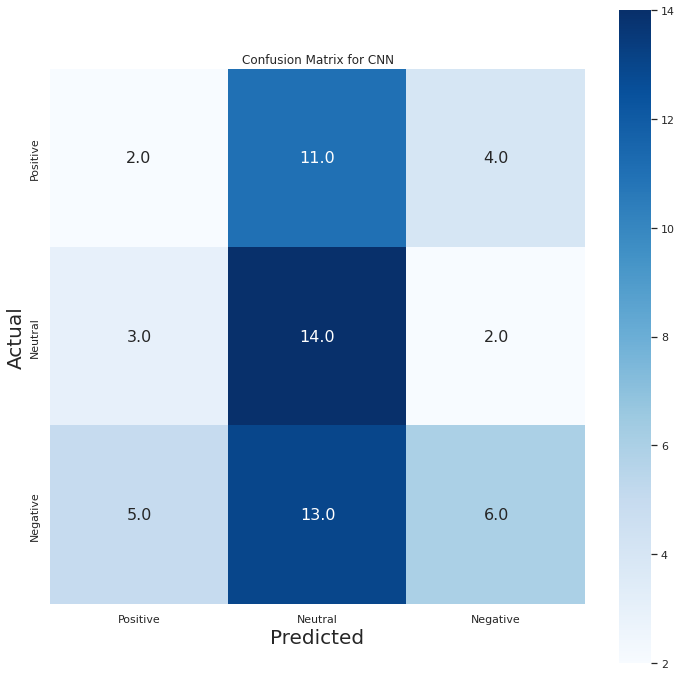

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = test_data_sr['pred_sentiment']
label=['Positive', 'Neutral','Negative']
Ytrue = test_data_sr['vader_sentiment_label']
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for CNN")
ax = sns.heatmap(cm, cmap="Blues", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

ROC AUC score: 0.5277350220222629


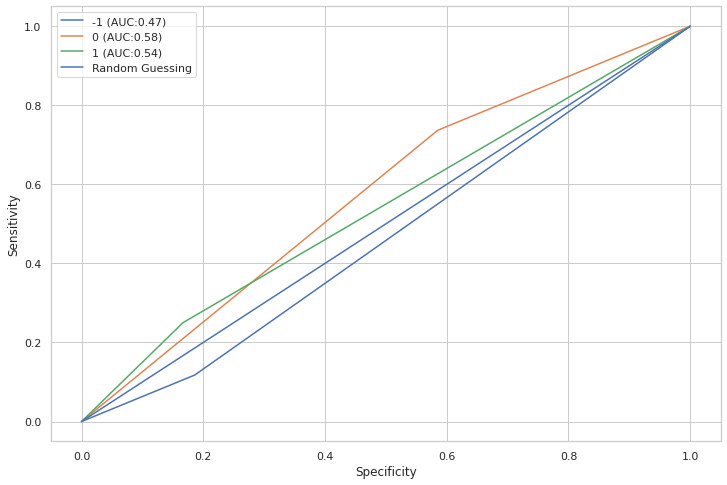

In [ ]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


target= [-1,0,1]

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(Ytrue, Ypred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(Ytrue)
    Ytrue = lb.transform(Ytrue)
    Ypred = lb.transform(Ypred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(Ytrue[:,idx].astype(int), Ypred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(Ytrue, Ypred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(Ytrue, Ypred))

c_ax.legend()
c_ax.set_xlabel('Specificity')
c_ax.set_ylabel('Sensitivity')
plt.show()

**Classifier : LSTM**

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras import losses
from collections import Counter
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import seaborn as sns
import pydot

In [ ]:
#train_data = pd.read_csv('/content/drive/MyDrive/Sentiment analysis/test1/new_test_240.csv', encoding= 'unicode_escape')

In [ ]:
#test_data_sr = pd.read_csv('/content/drive/MyDrive/Sentiment analysis/test1/final_new_test_60.csv', encoding= 'unicode_escape')

In [ ]:
def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>2))]) 
    
    return text2.lower()

In [ ]:
#review_data.dropna(axis = 0, how ='any',inplace=True) 
#review_data['reviewText'] = review_data['reviewText'].apply(remove_url)
train_data['review'] = train_data['review'].apply(clean_text)
train_data['Num_words_text'] = train_data['Num_words_text'].apply(lambda x:len(str(x).split())) 

In [ ]:
train_data['review']

0      was prescribed one dose over the course one da...
1      have been taking viberzi for month now for ibs...
2           reduced pain and lets live normal life again
3      had similar experience tremors hands not reall...
4      very prone yeast infections believe its due bi...
                             ...                        
235    have been implanon since november got just wee...
236    have been taking norco for foot surgery and ha...
237    after using medication for days feet legs and ...
238    ive been taking arava for months now worked th...
239    been experiencing very bad anxiety panic attac...
Name: review, Length: 239, dtype: object

In [ ]:
print('-------Dataset --------')
print(train_data['rating'].value_counts())
print(len(train_data))
print('-------------------------')

-------Dataset --------
1     44
10    35
5     33
9     27
2     23
6     21
7     18
8     17
3     13
4      8
Name: rating, dtype: int64
239
-------------------------


In [ ]:
max_review_data_sentence_length  = train_data['Num_words_text'].max()
print('Train Max Sentence Length :'+str(max_review_data_sentence_length))
#all_sentences = train_data['text'].tolist() + test_data['text'].tolist()

Train Max Sentence Length :1


In [ ]:
train_data['Num_words_text'].describe()

count    239.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: Num_words_text, dtype: float64

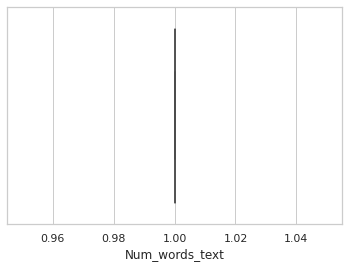

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(x=train_data['Num_words_text'])

In [ ]:
mask = (train_data['Num_words_text'] < 100) & (train_data['Num_words_text'] >=20)
df_short_reviews = train_data[mask]
print('No of Short reviews')
print(len(df_short_reviews))

mask = train_data['Num_words_text'] >= 100
df_long_reviews = train_data[mask]
print('No of Long reviews')
print(len(df_long_reviews))

No of Short reviews
0
No of Long reviews
0


In [ ]:
print(df_short_reviews['Num_words_text'].max())

nan


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239 entries, 0 to 239
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   uniqueID               239 non-null    int64  
 1   drugName               239 non-null    object 
 2   condition              239 non-null    object 
 3   review                 239 non-null    object 
 4   rating                 239 non-null    int64  
 5   date                   239 non-null    object 
 6   usefulCount            239 non-null    int64  
 7   Sentiment              239 non-null    object 
 8   vader_score            239 non-null    float64
 9   vader_sentiment_label  239 non-null    int64  
 10  Num_words_text         239 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 22.4+ KB


In [ ]:
train_data = train_data[['review','vader_sentiment_label']]
print('Train data')
print(train_data['vader_sentiment_label'].value_counts())

Train data
 0    110
 1     69
-1     60
Name: vader_sentiment_label, dtype: int64


In [ ]:
test_data = test_data_sr[['review','vader_sentiment_label']]
print('Test data')
print(test_data['vader_sentiment_label'].value_counts())

Test data
 1    24
 0    19
-1    17
Name: vader_sentiment_label, dtype: int64


In [ ]:
X = train_data['review'].tolist()
Y = train_data['vader_sentiment_label'].tolist()

In [ ]:
x = test_data_sr['review'].tolist()
y = test_data_sr['vader_sentiment_label'].tolist()

In [ ]:
print('Train data len:'+str(len(X)))
print('Class distribution'+str(Counter(Y)))
print('Valid data len:'+str(len(x)))
print('Class distribution'+ str(Counter(y)))

Train data len:239
Class distributionCounter({0: 110, 1: 69, -1: 60})
Valid data len:60
Class distributionCounter({1: 24, 0: 19, -1: 17})


In [ ]:
num_words = 50000
tokenizer = Tokenizer(num_words=num_words,oov_token="unk")
tokenizer.fit_on_texts(X)
print(str(tokenizer.texts_to_sequences(['xyz how are you'])))

[[1, 132, 55, 51]]


In [ ]:
X = np.array( tokenizer.texts_to_sequences(X) )
x = np.array( tokenizer.texts_to_sequences(x) )
x_test  = np.array( tokenizer.texts_to_sequences(test_data_sr['review'].tolist()) )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify

In [ ]:
X = pad_sequences(X, padding='post', maxlen=40)
x = pad_sequences(x, padding='post', maxlen=40)
x_test = pad_sequences(x_test, padding='post', maxlen=40)

In [ ]:
train_labels = np.asarray( tf.keras.utils.to_categorical(train_labels))
#print(train_labels)
valid_labels = le.transform(y)
valid_labels = np.asarray( tf.keras.utils.to_categorical(valid_labels))

In [ ]:
test_labels = le.transform(test_data_sr['vader_sentiment_label'].tolist())
test_labels = np.asarray(tf.keras.utils.to_categorical(test_labels))
list(le.classes_)

[-1, 0, 1]

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((X,train_labels))
valid_ds = tf.data.Dataset.from_tensor_slices((x,valid_labels))
test_ds = tf.data.Dataset.from_tensor_slices((x_test,test_labels))

In [ ]:
train_labels

array([[[1., 0.],
        [0., 1.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.],
        [1., 0.]],

       ...,

       [[0., 1.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [0., 1.],
        [1., 0.]],

       [[1., 0.],
        [0., 1.],
        [1., 0.]]], dtype=float32)

In [ ]:
#print('Train data len:'+str(len(X)))
#print('Class distribution'+str(Counter(train_labels)))
##print('Validation data len:'+str(len(x)))
#print('Class distribution'+str(Counter(valid_labels)))
#print('Test data len:'+str(len(x_test)))
#print('Class distribution'+str(Counter(test_labels)))

In [ ]:
#print(Y[:10])
#train_labels = le.fit_transform(Y)
#print('Text to number')
#print(train_labels[:10])
#train_labels = np.asarray( tf.keras.utils.to_categorical(train_labels))
#print('Number to category')
#print(train_labels[:10])

In [ ]:
count =0
print('======Train dataset ====')
for value,label in train_ds:
    count += 1
    print(value,label)
    if count==1:
        break
count =0
print('======Validation dataset ====')
for value,label in valid_ds:
    count += 1
    print(value,label)
    if count==1:
        break
count =0
print('======Test dataset ====')
for value,label in test_ds:
    count += 1
    print(value,label)
    if count==1:
        break  

======Train dataset ====
tf.Tensor(
[ 392  148 1318 1319  226   65   11  875    2 1320    3  876  108  210
  289   78  877  313   39  200  107    8  201  149   40    5 1321    2
  128   63   57  348  392  148  664    8  135  665  241   15], shape=(40,), dtype=int32) tf.Tensor(
[[1. 0.]
 [0. 1.]
 [1. 0.]], shape=(3, 2), dtype=float32)
======Validation dataset ====
tf.Tensor(
[ 273   72   99  105  346   18  430    4   86   32    3   15   37    2
  330    2  346   50   57    5  254 1763    1 2406   21   10   97    5
   88   73   21   44    2 1150  159   18    1    6    1    1], shape=(40,), dtype=int32) tf.Tensor([0. 0. 1.], shape=(3,), dtype=float32)
======Test dataset ====
tf.Tensor(
[ 273   72   99  105  346   18  430    4   86   32    3   15   37    2
  330    2  346   50   57    5  254 1763    1 2406   21   10   97    5
   88   73   21   44    2 1150  159   18    1    6    1    1], shape=(40,), dtype=int32) tf.Tensor([0. 0. 1.], shape=(3,), dtype=float32)


In [ ]:
max_features =50000
embedding_dim =16
sequence_length = 100
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features +1, embedding_dim, input_length=sequence_length,\
                                    embeddings_regularizer = regularizers.l2(0.005))) 
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.LSTM(embedding_dim,dropout=0.2, recurrent_dropout=0.2,return_sequences=True,\
                                                             kernel_regularizer=regularizers.l2(0.005),\
                                                             bias_regularizer=regularizers.l2(0.005)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(8, activation='relu',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))                          
model.summary()
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(1e-3),metrics=[tf.keras.metrics.BinaryAccuracy()])

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 100, 16)           800016    
                                                                 
 dropout_26 (Dropout)        (None, 100, 16)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 16)           2112      
                                                                 
 flatten_5 (Flatten)         (None, 1600)              0         
                                                                 
 dense_26 (Dense)            (None, 512)               819712    
                                                                 
 dropout_27 (Dropout)        (None, 512)               0         
                                                                 
 dense_27 (Dense)            (None, 8)               

In [ ]:
epochs = 100
# Fit the model using the train and test datasets.
#history = model.fit(x_train, train_labels,validation_data= (x_test,test_labels),epochs=epochs )
history = model.fit(train_ds.shuffle(5000).batch(1024),
                    epochs= epochs ,
                    validation_data=valid_ds.batch(1024),
                    verbose=1)

Epoch 1/100


ValueError: ignored